In [1]:
from google.colab import files
uploaded= files.upload()
filename= list(uploaded.keys())[0]
filename

Saving madfhantr.csv to madfhantr.csv


'madfhantr.csv'

# Classification(분류)
___
## Decision Tree 🌴
- Flow chart를 사용하여 feature-based splits를 통해 결과값을 예측
- Upside-Down 
- If- else 구문을 사용함 
- 대부분 결과값이 'yes' or 'no'

#### ✅ ML(머신러닝)의 목표 
- 불확실성 과 애매함을 줄이기

### Decision Tree를 활용한 데이터 분석 1

* Reference : https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/#ProblemStatement

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [159]:
data = pd.read_csv(filename)
data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


* 데이터 전처리하기(Pre-Processing)

In [160]:
# 결측치 확인 
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [161]:
# 결측치 처리하기 (어떤 데이터인지에 따라서 결정해야한다)
# 여기서는 성별의 경우 남자인지 여자인지 확실하지 않기때문에 데이터를 삭제하기로 한다

data.dropna(inplace=True)

In [52]:
# Category 데이터는 fit할때 직접 사용 할 수 없기 때문에, '숫자로 변환해야한다' 
loandata = data[['Gender', 'Married', 'Education', 'Self_Employed', 'Credit_History', 'Loan_Status']]
loandata['Gender']= loandata['Gender'].replace(to_replace='Male', value='1')
loandata['Gender']= loandata['Gender'].replace(to_replace='Female', value='0')
loandata['Married'] = loandata['Married'].replace(to_replace='Yes', value ='1')
loandata['Married'] = loandata['Married'].replace(to_replace='No', value ='0')
loandata['Education'] = loandata['Education'].replace(to_replace='Graduate', value ='1')
loandata['Education'] = loandata['Education'].replace(to_replace='Not Graduate', value='0')
loandata['Self_Employed'] = loandata['Self_Employed'].replace(to_replace='Yes', value='1')
loandata['Self_Employed'] = loandata['Self_Employed'].replace(to_replace='No', value='0')

In [206]:
# Tip :  ApplicantIncome, Loan_Amount_Term 과 같은 데이터는 벙위를 지정해서 구별하는 것이 훨씬 정확한 예측값을 도출 할 수 있다

In [53]:
loandata.head()

,Gender,Married,Education,Self_Employed,Credit_History,Loan_Status
1,1,1,1,0,1.0,N
2,1,1,1,1,1.0,Y
3,1,1,0,0,1.0,Y
4,1,0,1,0,1.0,Y
5,1,1,1,1,1.0,Y


___
## Decision Tree 🌲

#### 성능이 좋은 Decision Tree를 만드는 과정에서 고려해야할 사항
- root node는 어떤 feature로 정할 것인가?
- decision node는 무엇인가?
- 언제 splitting을 멈춰야 할것인가? 
<br>

### Entropy
  $$ E(S) = -p_+(logp_+)-p_-(logp_-) $$

- **Entropy**
  - Impurity of node 
    - Impurity : degree of randomness 
    - Pure sub-split : 'yes' or 'no' 값이 나와야함 

  - **Disorderness**의 예시🎥<br>
 주말에 친구들과 영화를 보기로했다.<br>
 4명의 친구는 'Lucy'를 원하고 나머지 5명은 'Titanic'을 원한다.<br>과반수라고 보기에는 애매한 결과 값이 나왔다 
  - Entropy의 <u>값이 작을 수록 좋음 </u>
  - ⚠️ Engropy식으로만 사용해서 전체의 decision tree를 판단하는 것은 한계가 있음 

### <span style="color:red">Information gain </span> 💥
$$ InformationGain = E(Y) - E(Y|X) $$ 

- 부모 node의 purity 판별 
- Information gain 을 통해서 root node 와 decision node를 판별한다
- 얼만큼 줄었는지에 대한 값이기 때문에 <u>값이 클 수록 좋다</u>
<br>


___

## Stop splitting 
### Hyper Parameter Tuning 
상황에 맞춰서 각 method를 적용

- max_depth 
  - 그래프의 길이, 몇번 splitting 할 것인가?
- min_samples_split
  - 데이터 안에 일정한 숫자를 설정, 숫자만큼의 데이터가 없으면 STOP
- min__samples_leaf
  - leaf node 데이터 안에 일정한 숫자를 설정
- max_features 
  - features 갯수 설정 


In [93]:
from sklearn.model_selection import train_test_split 

x = loandata.drop(columns=['Loan_Status'])
y = loandata.Loan_Status

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 42)

In [57]:
# fitting 과정을 통해서 이미 모든 value가 정해지며 그래프가 함께 그려짐 
# entropy, Information Gain 값까지 모두 정함 

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

___
### Decision Tree 구성요소🌲
- Root node (시작점)
- Decision nodes 
  - spliting 한 모든 nodes 들 
- Leaf nodes (Terminal nodes)
  - 더이상 spliting 되지 않는 값, 맨 마지막 값
- Sub-tree 
  - 전체 그래프에서 특정 부분 
- Pruning 
  - overfitting을 피하기 위해서 spliting을 멈추는 행위
    - Pre-pruning 
    - Post-pruning

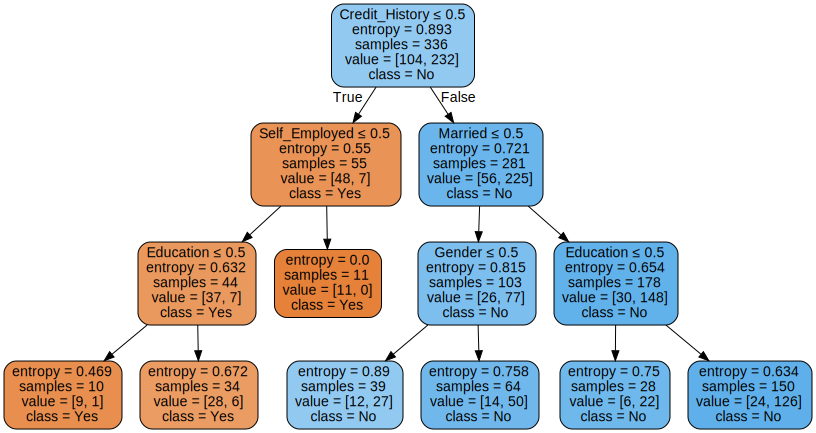

In [58]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None,
feature_names=['Gender','Married', 'Education', 'Self_Employed', 'Credit_History'],
class_names=['Yes','No'], filled =True,
rounded =True,
special_characters=True)
graph = graphviz.Source(dot_data)
graph.render('Entropy')
graph

* 성능평가

In [20]:
clf.score(x_test, y_test)

0.7986111111111112

### Decision Tree를 이용한 데이터 분석 2

In [195]:
data = pd.read_csv(filename)
data.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [196]:
data.dropna(inplace=True)

In [197]:
data.Dependents.unique()

array(['1', '0', '2', '3+'], dtype=object)

In [198]:
# Category 데이터는 fit할때 직접 사용 할 수 없기 때문에, '숫자로 변환해야한다' 
data = data[['Married','Self_Employed', 'ApplicantIncome','LoanAmount','Credit_History','Loan_Status']]
#data['Gender']= data['Gender'].replace(to_replace='Male', value='1')
#data['Gender']= data['Gender'].replace(to_replace='Female', value='0')
#data['Education'] = data['Education'].replace(to_replace='Graduate', value ='1')
#data['Education'] = data['Education'].replace(to_replace='Not Graduate', value='0')
data['Married'] = data['Married'].replace(to_replace='Yes', value ='1')
data['Married'] = data['Married'].replace(to_replace='No', value ='0')
data['Self_Employed'] = data['Self_Employed'].replace(to_replace='Yes', value='1')
data['Self_Employed'] = data['Self_Employed'].replace(to_replace='No', value='0')
#data['Dependents'] = data['Dependents'].replace(to_replace='3+', value='3')

In [199]:
data.head()

,Married,Self_Employed,ApplicantIncome,LoanAmount,Credit_History,Loan_Status
1,1,0,4583,128.0,1.0,N
2,1,1,3000,66.0,1.0,Y
3,1,0,2583,120.0,1.0,Y
4,0,0,6000,141.0,1.0,Y
5,1,1,5417,267.0,1.0,Y


* train, test 데이터 분리하기

In [200]:
x = data.drop(columns=['Loan_Status'])
y = data.Loan_Status

In [201]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 
scaler = MinMaxScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state = 42)

In [202]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

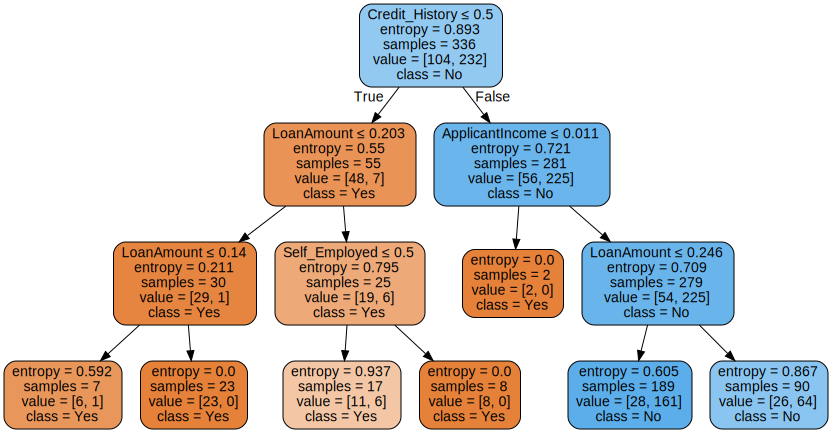

In [204]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None,
feature_names=['Married','Self_Employed', 'ApplicantIncome','LoanAmount','Credit_History'],
class_names=['Yes','No'], filled =True,
rounded =True,
special_characters=True)
graph = graphviz.Source(dot_data)
graph.render('Entropy')
graph

* 성능평가

In [205]:
clf.score(x_test, y_test)

0.7916666666666666